In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_file = pd.read_csv("Data/test.csv")
train_file = pd.read_csv("Data/train.csv")

In [3]:
train_file.head(10)

#columns:
#passengerid, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [4]:
train_file = train_file.drop(columns = ['PassengerId'])

In [5]:
#checking the survived feature
train_file['Survived'].unique()

array([0, 1])

Text(0.5, 1.0, 'Survived')

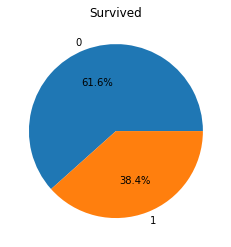

In [6]:
plt.pie(train_file['Survived'].value_counts(), labels=train_file['Survived'].value_counts().index, autopct='%1.1f%%')
plt.title("Survived")

#we can clearly see that most people died

Text(0.5, 1.0, 'Survived by Age')

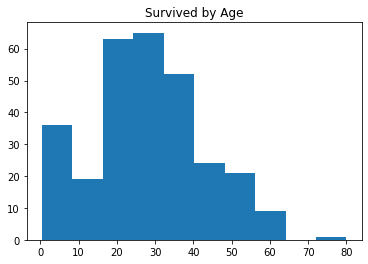

In [7]:
survived = train_file[train_file['Survived'] == 1]

plt.hist(survived['Age'])
plt.title("Survived by Age")
#the most people who survived was between 17~40 years old

In [8]:
#now we are gonna do the same, but using the "Sex" column
#but first we need to transform it in a numerical feature

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
sex_column_encoded = encoder.fit_transform(train_file['Sex'])

train_file['Sex'] = sex_column_encoded

#test data
encoder_test = preprocessing.LabelEncoder()
sex_column_encoded = encoder_test.fit_transform(test_file['Sex'])

test_file['Sex'] = sex_column_encoded

In [9]:
#1 = male
#0 = female

train_file.head(10)

Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    1   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   
2         1       3                             Heikkinen, Miss. Laina    0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   
4         0       3                           Allen, Mr. William Henry    1   
5         0       3                                   Moran, Mr. James    1   
6         0       1                            McCarthy, Mr. Timothy J    1   
7         0       3                     Palsson, Master. Gosta Leonard    1   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)    0   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  38.0      1      0          PC 17599  71.2833   C85        C  
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  35.0      1      0            113803  53.1000  C123        S  
4  35.0      0      0            373450   8.0500   NaN        S  
5   NaN      0      0            330877   8.4583   NaN        Q  
6  54.0      0      0             17463  51.8625   E46        S  
7   2.0      3      1            349909  21.0750   NaN        S  
8  27.0      0      2            347742  11.1333   NaN        S  
9  14.0      1      0            237736  30.0708   NaN        C

Text(0.5, 1.0, 'Survived by Sex')

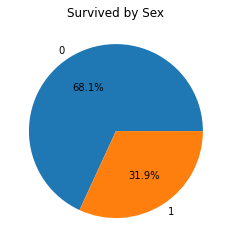

In [10]:
survived = train_file[train_file['Survived'] == 1]

plt.pie(survived['Sex'].value_counts(), labels=survived['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title("Survived by Sex")

#most of the survivors are women

(array([17.,  5., 11., 29., 13.,  9.,  6.,  2.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

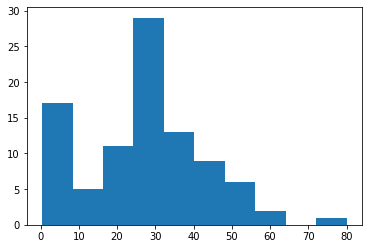

In [11]:
men_survived = survived[survived['Sex'] == 1]
plt.hist(men_survived['Age'])

#the males who most survived were between 27~31 years old

(array([17.,  4., 32., 34., 32., 32., 17., 13.,  9.,  7.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <BarContainer object of 10 artists>)

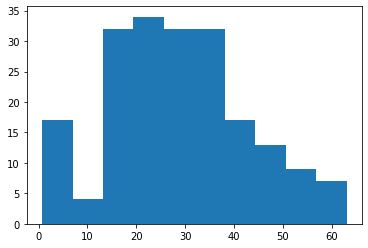

In [12]:
men_survived = survived[survived['Sex'] == 0]
plt.hist(men_survived['Age'])

#the females who most survived were between 13~37 years old

Text(0.5, 1.0, 'Pclass values')

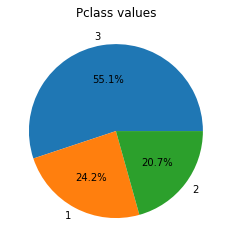

In [13]:
#lets check the pclass

plt.pie(train_file['Pclass'].value_counts(), labels=train_file['Pclass'].value_counts().index, autopct="%1.1f%%")
plt.title("Pclass values")

#we have tree possible values for pclass: 1, 2 and 3

Text(0.5, 1.0, 'Survived by Pclass')

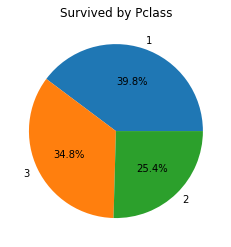

In [14]:
plt.pie(survived['Pclass'].value_counts(), labels=survived['Pclass'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Pclass")

#almost 40% of the survivors was from the pclass 1
#and 35% from pclass 3
#so passengers from that class have a bigger chance to survive

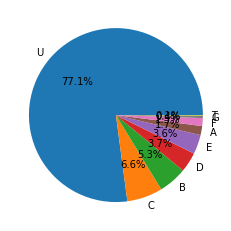

In [15]:
#U for Unknown
train_file['Cabin'].fillna("U", inplace=True)

#we are going to pick only the letter of the cabin
#so we can see how many cabins had (A, B, C, D, E, F, G, U(Unknown cabin))
train_file['Cabin'] = train_file['Cabin'].str[0]

plt.pie(train_file['Cabin'].value_counts(), labels=train_file['Cabin'].value_counts().index, autopct="%1.1f%%")

#test data

test_file['Cabin'].fillna("U", inplace=True)
test_file['Cabin'] = test_file['Cabin'].str[0]

In [16]:
cabin_dummies = pd.get_dummies(train_file['Cabin'], prefix="Cabin")

train_file = pd.concat([train_file, cabin_dummies], axis=1)

#dropping the old unformated 'cabin' column
train_file = train_file.drop(columns=['Cabin'])

#test data
cabin_dummies_test = pd.get_dummies(test_file['Cabin'], prefix="Cabin")

test_file = pd.concat([test_file, cabin_dummies_test], axis=1)

#dropping the old unformated 'cabin' column
test_file = test_file.drop(columns=['Cabin'])

In [17]:
#let's see the ticket column

train_file['Ticket'].value_counts()

#we have almost 700 unique values, so probably it is not worth it use it
#let's drop it
 
train_file = train_file.drop(columns=['Ticket'])
test_file = test_file.drop(columns=['Ticket'])

Text(0.5, 1.0, 'Embarked values')

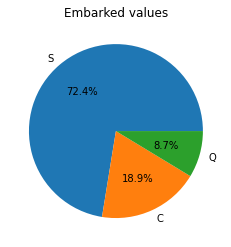

In [18]:
#now let's check the 'embarked' column

plt.pie(train_file['Embarked'].value_counts(), labels=train_file['Embarked'].value_counts().index, autopct="%1.1f%%")
plt.title("Embarked values")

# S = Southampton
# C = Cherbourg
# Q = Queenstown

Text(0.5, 1.0, 'Survived by Embarked')

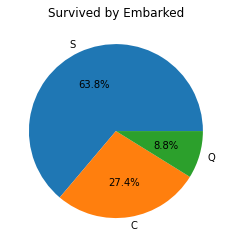

In [19]:
plt.pie(survived['Embarked'].value_counts(), labels=survived['Embarked'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Embarked")

#almost 64% of the survivors were from the Embarked S (Southampton)

In [20]:
#let's check the sibsp and parch columns
#sibsp = # of siblings / spouses aboard the Titanic
#parch = # of parents / children aboard the Titanic

train_file[['SibSp', 'Parch']].isnull().sum()

SibSp    0
Parch    0
dtype: int64

(array([[608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.],
        [678., 118.,  80.,   5.,   0.,   4.,   5.,   1.,   0.,   0.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 2 BarContainer objects>)

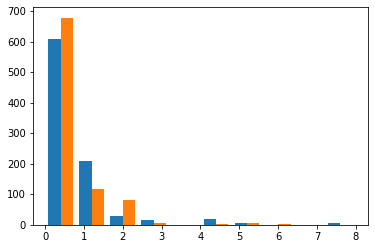

In [21]:
plt.hist(train_file[['SibSp', 'Parch']])

In [22]:
train_file['RelativesOnboard'] = train_file['SibSp'] + train_file['Parch']
train_file.drop(columns=['SibSp', 'Parch'], inplace=True)

#test data
test_file['RelativesOnboard'] = test_file['SibSp'] + test_file['Parch']
test_file.drop(columns=['SibSp', 'Parch'], inplace=True)

In [23]:
train_file['isAlone'] = np.where(train_file['RelativesOnboard'] > 0, 0, 1)
train_file.drop(columns=['RelativesOnboard'], inplace=True)
train_file.head(10)

#test data
test_file['isAlone'] = np.where(test_file['RelativesOnboard'] > 0, 0, 1)
test_file.drop(columns=['RelativesOnboard'], inplace=True)
test_file.head(10)

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   
5          897       3                    Svensson, Mr. Johan Cervin    1   
6          898       3                          Connolly, Miss. Kate    0   
7          899       2                  Caldwell, Mr. Albert Francis    1   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)    0   
9          901       3                       Davies, Mr. John Samuel    1   

    Age     Fare Embarked  Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
0  34.5   7.8292        Q        0        0        0        0        0   
1  47.0   7.0000        S        0        0        0        0        0   
2  62.0   9.6875        Q        0        0        0        0        0   
3  27.0   8.6625        S        0        0        0        0        0   
4  22.0  12.2875        S        0        0        0        0        0   
5  14.0   9.2250        S        0        0        0        0        0   
6  30.0   7.6292        Q        0        0        0        0        0   
7  26.0  29.0000        S        0        0        0        0        0   
8  18.0   7.2292        C        0        0        0        0        0   
9  21.0  24.1500        S        0        0        0        0        0   

   Cabin_F  Cabin_G  Cabin_U  isAlone  
0        0        0        1        1  
1        0        0        1        0  
2        0        0        1        1  
3        0        0        1        1  
4        0        0        1        0  
5        0        0        1        1  
6        0        0        1        1  
7        0        0        1        0  
8        0        0        1        1  
9        0        0        1        0

In [24]:
#let's check the 'fare' columnn

train_file['Fare'].isnull().sum()

0

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

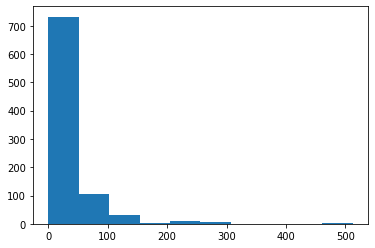

In [25]:
plt.hist(train_file['Fare'])

In [26]:
#let's check the 'name' column

train_file[['Last_Name', 'First_Name']] = train_file['Name'].str.split(',', expand=True)
train_file.drop(columns=['Last_Name', 'Name'], inplace=True)

train_file.head(10)

#test data
test_file[['Last_Name', 'First_Name']] = test_file['Name'].str.split(',', expand=True)
test_file.drop(columns=['Last_Name', 'Name'], inplace=True)

In [27]:
train_file[['Title', 'Full_Name']] = train_file['First_Name'].str.split('.', 1, expand=True)
train_file.drop(columns=['Full_Name', 'First_Name'], inplace=True)

train_file.head(10)

#test data
test_file[['Title', 'Full_Name']] = test_file['First_Name'].str.split('.', 1, expand=True)
test_file.drop(columns=['Full_Name', 'First_Name'], inplace=True)

Text(0.5, 1.0, "Title's values")

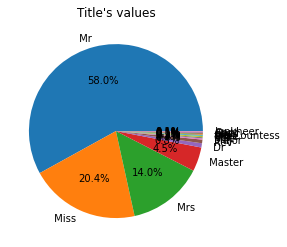

In [28]:
plt.pie(train_file['Title'].value_counts(), labels=train_file['Title'].value_counts().index, autopct="%1.1f%%")
plt.title("Title's values")

In [29]:
train_file['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Mme               1
 the Countess      1
 Don               1
 Ms                1
 Lady              1
 Sir               1
 Capt              1
 Jonkheer          1
Name: Title, dtype: int64

Text(0.5, 1.0, 'Survived by Title')

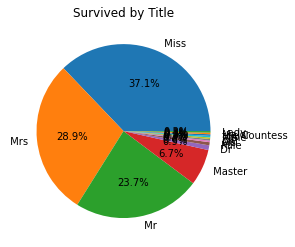

In [30]:
survived = train_file[train_file['Survived'] == 1]
plt.pie(survived['Title'].value_counts(), labels=survived['Title'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Title")

#more than 66% of the survivores had a "miss" or "mrs" title (female title)
#more than 30% of the survivores had a "mr" or "master" title (male title)

In [31]:
'''
 Mr              515
 Miss            181
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Ms                1
 Sir               1
 Don               1
 Capt              1
 the Countess      1
 Mme               1
 Jonkheer          1
 Lady              1
'''

train_file['Title'].replace([' Dr', ' Rev', ' Major', ' Mlle', ' Col', ' Ms', ' Sir',
                    ' Don', ' Capt', ' the Countess', ' Mme', ' Jonkheer', ' Lady'], ' Others', inplace=True)

#test data
test_file['Title'].replace([' Dr', ' Rev', ' Major', ' Mlle', ' Col', ' Ms', ' Sir',
                    ' Don', ' Capt', ' the Countess', ' Mme', ' Jonkheer', ' Lady'], ' Others', inplace=True)

Text(0.5, 1.0, "Title's values")

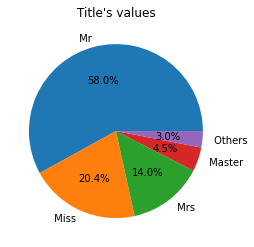

In [32]:
plt.pie(train_file['Title'].value_counts(), labels=train_file['Title'].value_counts().index, autopct="%1.1f%%")
plt.title("Title's values")

In [33]:
train_file.head(10)

Survived  Pclass  Sex   Age     Fare Embarked  Cabin_A  Cabin_B  Cabin_C  \
0         0       3    1  22.0   7.2500        S        0        0        0   
1         1       1    0  38.0  71.2833        C        0        0        1   
2         1       3    0  26.0   7.9250        S        0        0        0   
3         1       1    0  35.0  53.1000        S        0        0        1   
4         0       3    1  35.0   8.0500        S        0        0        0   
5         0       3    1   NaN   8.4583        Q        0        0        0   
6         0       1    1  54.0  51.8625        S        0        0        0   
7         0       3    1   2.0  21.0750        S        0        0        0   
8         1       3    0  27.0  11.1333        S        0        0        0   
9         1       2    0  14.0  30.0708        C        0        0        0   

   Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  Cabin_U  isAlone    Title  
0        0        0        0        0        0        1        0       Mr  
1        0        0        0        0        0        0        0      Mrs  
2        0        0        0        0        0        1        1     Miss  
3        0        0        0        0        0        0        0      Mrs  
4        0        0        0        0        0        1        1       Mr  
5        0        0        0        0        0        1        1       Mr  
6        0        1        0        0        0        0        1       Mr  
7        0        0        0        0        0        1        0   Master  
8        0        0        0        0        0        1        0      Mrs  
9        0        0        0        0        0        1        0      Mrs

In [34]:
#lets check to see if we find some nan values

train_file.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Cabin_U       0
isAlone       0
Title         0
dtype: int64

In [35]:
mode = train_file['Embarked'].mode()[0]

train_file['Embarked'].fillna(mode, inplace=True)

#test data
mode_test = test_file['Embarked'].mode()[0]

test_file['Embarked'].fillna(mode_test, inplace=True)

In [36]:
train_file.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Cabin_U       0
isAlone       0
Title         0
dtype: int64

In [37]:
man = train_file[train_file['Sex'] == 1]
man_median = man['Age'].median()

woman = train_file[train_file['Sex'] == 0]
woman_median = woman['Age'].median()

np.where(train_file['Sex'] == 1,
         train_file['Age'].fillna(man_median, inplace=True),
         train_file['Age'].fillna(woman_median, inplace=True))

#test data
man_test = test_file[test_file['Sex'] == 1]
man_median_test = man_test['Age'].median()

woman_test = test_file[test_file['Sex'] == 0]
woman_median_test = woman_test['Age'].median()

np.where(test_file['Sex'] == 1,
         test_file['Age'].fillna(man_median_test, inplace=True),
         test_file['Age'].fillna(woman_median_test, inplace=True))

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, No

In [38]:
train_file['CategoricalAge'] = pd.cut(train_file['Age'], 4)

#test data
test_file['CategoricalAge'] = pd.cut(test_file['Age'], 4)

In [39]:
train_file.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
Fare              0
Embarked          0
Cabin_A           0
Cabin_B           0
Cabin_C           0
Cabin_D           0
Cabin_E           0
Cabin_F           0
Cabin_G           0
Cabin_T           0
Cabin_U           0
isAlone           0
Title             0
CategoricalAge    0
dtype: int64

In [40]:
train_file.describe()

Survived      Pclass         Sex         Age        Fare     Cabin_A  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.560236   32.204208    0.016835   
std      0.486592    0.836071    0.477990   13.005010   49.693429    0.128725   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    7.910400    0.000000   
50%      0.000000    3.000000    1.000000   29.000000   14.454200    0.000000   
75%      1.000000    3.000000    1.000000   35.000000   31.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000  512.329200    1.000000   

          Cabin_B     Cabin_C     Cabin_D     Cabin_E     Cabin_F     Cabin_G  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.052750    0.066218    0.037037    0.035915    0.014590    0.004489   
std      0.223659    0.248802    0.188959    0.186182    0.119973    0.066890   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          Cabin_T     Cabin_U     isAlone  
count  891.000000  891.000000  891.000000  
mean     0.001122    0.771044    0.602694  
std      0.033501    0.420397    0.489615  
min      0.000000    0.000000    0.000000  
25%      0.000000    1.000000    0.000000  
50%      0.000000    1.000000    1.000000  
75%      0.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

In [41]:
train_file['CategoricalAge']

0      (20.315, 40.21]
1      (20.315, 40.21]
2      (20.315, 40.21]
3      (20.315, 40.21]
4      (20.315, 40.21]
            ...       
886    (20.315, 40.21]
887     (0.34, 20.315]
888    (20.315, 40.21]
889    (20.315, 40.21]
890    (20.315, 40.21]
Name: CategoricalAge, Length: 891, dtype: category
Categories (4, interval[float64]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]

In [42]:
#Mapping Age column

train_file.loc[ train_file['CategoricalAge'] == '[(0.34, 20.315]', 'Age'] = 0
train_file.loc[ train_file['CategoricalAge'] == '(20.315, 40.21]', 'Age'] = 1
train_file.loc[ train_file['CategoricalAge'] == '(40.21, 60.105]', 'Age'] = 2
train_file.loc[ train_file['CategoricalAge'] == '(60.105, 80.0]', 'Age'] = 3

train_file.drop(columns = ["CategoricalAge"], inplace=True)

#Test data

test_file.loc[ test_file['CategoricalAge'] == '[(0.34, 20.315]', 'Age'] = 0
test_file.loc[ test_file['CategoricalAge'] == '(20.315, 40.21]', 'Age'] = 1
test_file.loc[ test_file['CategoricalAge'] == '(40.21, 60.105]', 'Age'] = 2
test_file.loc[ test_file['CategoricalAge'] == '(60.105, 80.0]', 'Age'] = 3

test_file.drop(columns = ["CategoricalAge"], inplace=True)

In [43]:
train_file.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
Embarked     object
Cabin_A       uint8
Cabin_B       uint8
Cabin_C       uint8
Cabin_D       uint8
Cabin_E       uint8
Cabin_F       uint8
Cabin_G       uint8
Cabin_T       uint8
Cabin_U       uint8
isAlone       int64
Title        object
dtype: object

In [44]:
#title dummies

title_dummies = pd.get_dummies(train_file['Title'], prefix='Title')
train_file = pd.concat([train_file, title_dummies], axis=1)
train_file.drop(columns=['Title'], inplace=True)
train_file.head(10)

#test data
title_dummies_test = pd.get_dummies(test_file['Title'], prefix='Title')
test_file = pd.concat([test_file, title_dummies_test], axis=1)
test_file.drop(columns=['Title'], inplace=True)
test_file.head(10)

PassengerId  Pclass  Sex   Age     Fare Embarked  Cabin_A  Cabin_B  \
0          892       3    1  34.5   7.8292        Q        0        0   
1          893       3    0  47.0   7.0000        S        0        0   
2          894       2    1  62.0   9.6875        Q        0        0   
3          895       3    1  27.0   8.6625        S        0        0   
4          896       3    0  22.0  12.2875        S        0        0   
5          897       3    1  14.0   9.2250        S        0        0   
6          898       3    0  30.0   7.6292        Q        0        0   
7          899       2    1  26.0  29.0000        S        0        0   
8          900       3    0  18.0   7.2292        C        0        0   
9          901       3    1  21.0  24.1500        S        0        0   

   Cabin_C  Cabin_D  ...  Cabin_F  Cabin_G  Cabin_U  isAlone  Title_ Dona  \
0        0        0  ...        0        0        1        1            0   
1        0        0  ...        0        0        1        0            0   
2        0        0  ...        0        0        1        1            0   
3        0        0  ...        0        0        1        1            0   
4        0        0  ...        0        0        1        0            0   
5        0        0  ...        0        0        1        1            0   
6        0        0  ...        0        0        1        1            0   
7        0        0  ...        0        0        1        0            0   
8        0        0  ...        0        0        1        1            0   
9        0        0  ...        0        0        1        0            0   

   Title_ Master  Title_ Miss  Title_ Mr  Title_ Mrs  Title_ Others  
0              0            0          1           0              0  
1              0            0          0           1              0  
2              0            0          1           0              0  
3              0            0          1           0              0  
4              0            0          0           1              0  
5              0            0          1           0              0  
6              0            1          0           0              0  
7              0            0          1           0              0  
8              0            0          0           1              0  
9              0            0          1           0              0  

[10 rows x 21 columns]

In [45]:
#embarked dummies

title_dummies = pd.get_dummies(train_file['Embarked'], prefix='Embarked')
train_file = pd.concat([train_file, title_dummies], axis=1)
train_file.drop(columns=['Embarked'], inplace=True)
train_file.head(10)

#test data

title_dummies_test = pd.get_dummies(test_file['Embarked'], prefix='Embarked')
test_file = pd.concat([test_file, title_dummies_test], axis=1)
test_file.drop(columns=['Embarked'], inplace=True)

In [46]:
train_file.dtypes

Survived           int64
Pclass             int64
Sex                int64
Age              float64
Fare             float64
Cabin_A            uint8
Cabin_B            uint8
Cabin_C            uint8
Cabin_D            uint8
Cabin_E            uint8
Cabin_F            uint8
Cabin_G            uint8
Cabin_T            uint8
Cabin_U            uint8
isAlone            int64
Title_ Master      uint8
Title_ Miss        uint8
Title_ Mr          uint8
Title_ Mrs         uint8
Title_ Others      uint8
Embarked_C         uint8
Embarked_Q         uint8
Embarked_S         uint8
dtype: object

In [47]:
train_file.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
Fare             0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Cabin_U          0
isAlone          0
Title_ Master    0
Title_ Miss      0
Title_ Mr        0
Title_ Mrs       0
Title_ Others    0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

X = train_file.drop(columns=['Survived'])
y = train_file['Survived']
accuracies = []
models = []

X.head(10)

Pclass  Sex   Age     Fare  Cabin_A  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
0       3    1  22.0   7.2500        0        0        0        0        0   
1       1    0  38.0  71.2833        0        0        1        0        0   
2       3    0  26.0   7.9250        0        0        0        0        0   
3       1    0  35.0  53.1000        0        0        1        0        0   
4       3    1  35.0   8.0500        0        0        0        0        0   
5       3    1  29.0   8.4583        0        0        0        0        0   
6       1    1  54.0  51.8625        0        0        0        0        1   
7       3    1   2.0  21.0750        0        0        0        0        0   
8       3    0  27.0  11.1333        0        0        0        0        0   
9       2    0  14.0  30.0708        0        0        0        0        0   

   Cabin_F  ...  Cabin_U  isAlone  Title_ Master  Title_ Miss  Title_ Mr  \
0        0  ...        1        0              0            0          1   
1        0  ...        0        0              0            0          0   
2        0  ...        1        1              0            1          0   
3        0  ...        0        0              0            0          0   
4        0  ...        1        1              0            0          1   
5        0  ...        1        1              0            0          1   
6        0  ...        0        1              0            0          1   
7        0  ...        1        0              1            0          0   
8        0  ...        1        0              0            0          0   
9        0  ...        1        0              0            0          0   

   Title_ Mrs  Title_ Others  Embarked_C  Embarked_Q  Embarked_S  
0           0              0           0           0           1  
1           1              0           1           0           0  
2           0              0           0           0           1  
3           1              0           0           0           1  
4           0              0           0           0           1  
5           0              0           0           1           0  
6           0              0           0           0           1  
7           0              0           0           0           1  
8           1              0           0           0           1  
9           1              0           1           0           0  

[10 rows x 22 columns]

In [49]:
test_file.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
Fare             1
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_U          0
isAlone          0
Title_ Dona      0
Title_ Master    0
Title_ Miss      0
Title_ Mr        0
Title_ Mrs       0
Title_ Others    0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [50]:
test_file['Fare'].fillna(test_file['Fare'].median(), inplace=True)

In [51]:
train_file['CategoricalFare'] = pd.cut(train_file['Fare'], 4)

#test data
test_file['CategoricalFare'] = pd.cut(test_file['Fare'], 4)

In [52]:
test_file['CategoricalFare']

0      (-0.512, 128.082]
1      (-0.512, 128.082]
2      (-0.512, 128.082]
3      (-0.512, 128.082]
4      (-0.512, 128.082]
             ...        
413    (-0.512, 128.082]
414    (-0.512, 128.082]
415    (-0.512, 128.082]
416    (-0.512, 128.082]
417    (-0.512, 128.082]
Name: CategoricalFare, Length: 418, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [53]:
#Mapping Age column

train_file.loc[ train_file['CategoricalFare'] == '(-0.647, 1.656]', 'Fare'] = 0
train_file.loc[ train_file['CategoricalFare'] == '(1.656, 3.949]', 'Fare'] = 1
train_file.loc[ train_file['CategoricalFare'] == '(3.949, 6.243]', 'Fare'] = 2
train_file.loc[ train_file['CategoricalFare'] == '(6.243, 8.537]', 'Fare'] = 3

train_file.drop(columns = ["CategoricalFare"], inplace=True)

#Test data

test_file.loc[ test_file['CategoricalFare'] == '(-0.647, 1.656]', 'Fare'] = 0
test_file.loc[ test_file['CategoricalFare'] == '(1.656, 3.949]', 'Fare'] = 1
test_file.loc[ test_file['CategoricalFare'] == '(3.949, 6.243]', 'Fare'] = 2
test_file.loc[ test_file['CategoricalFare'] == '(6.243, 8.537]', 'Fare'] = 3

test_file.drop(columns = ["CategoricalFare"], inplace=True)

<AxesSubplot:>

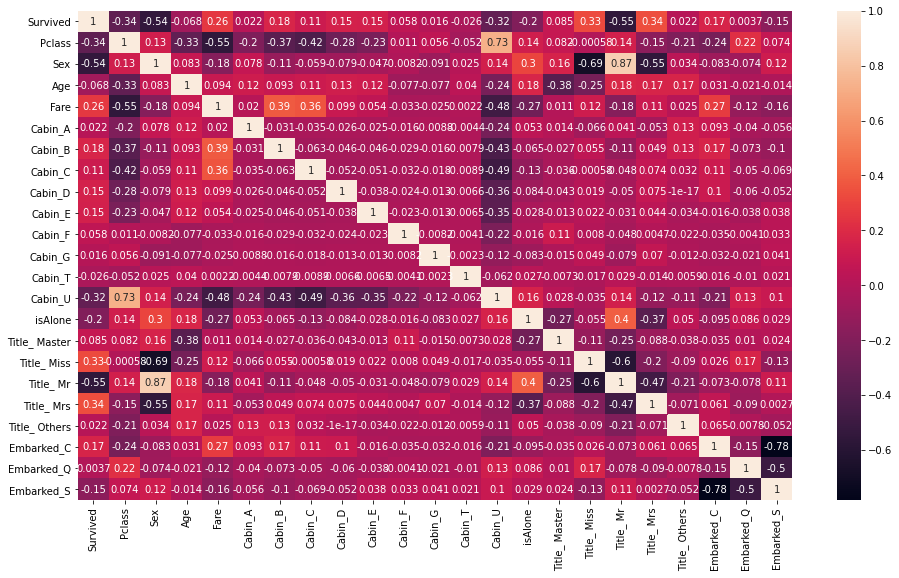

In [54]:
plt.figure(figsize = (16, 9))

sns.heatmap(train_file.corr(), annot=True)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=19) 

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state = 19)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Random Forest Classifier")

### SVC

In [57]:
from sklearn.svm import SVC

svc = SVC(random_state=19)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("SVC")

### Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=19)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Decision Tree Classifier")

### K Neighbors Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("K Neighbors Classifier")

### XGBoost

In [60]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("XGBoost")

[00:01:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(random_state=19)

gradient.fit(X_train, y_train)
y_pred = gradient.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Gradient Boosting Classifier")

### Perceptron

In [62]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(early_stopping=True, random_state=19)

perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Perceptron")

### LightGBM

In [63]:
import lightgbm

lgbm = lightgbm.LGBMClassifier(random_state=19)

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("LightGBM")

### Stacking Models Classifier

In [64]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('random_forest', rf),
    ('svc', svc),
    ('decision_tree', tree),
    ('knn', knn),
    ('xgboost', xgb),
    ('gradient_boosting', gradient),
    ('perceptron', perceptron),
    ('lightgbm', lgbm)
]

stacking_classifier = StackingClassifier(estimators = estimators,
                                         final_estimator = LogisticRegression(random_state=19),
                                         n_jobs = -1)

stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Stacking Classifier")

In [65]:
data = pd.DataFrame({"Model": models,
                    "Accuracy": accuracies})

pivot_table = pd.pivot_table(data, index="Model")
pivot_table

Accuracy
Model                                 
Decision Tree Classifier         83.58
Gradient Boosting Classifier     87.31
K Neighbors Classifier           71.64
LightGBM                         89.55
Perceptron                       67.91
Random Forest Classifier         86.57
SVC                              67.16
Stacking Classifier              90.30
XGBoost                          86.57

In [66]:
#we will need to save the passengerid from the train file
#because we are gonna used it to send the submission
passengers_id = test_file['PassengerId']
test_file = test_file.drop(columns = ['PassengerId'])

In [67]:
predictions = stacking_classifier.predict(test_file)

submission = pd.DataFrame({'PassengerId': passengers_id,
                           'Survived': predictions})

submission.to_csv("submission_titanic.csv", index=False)

## Parameter tuning with Optuna (LightGBM)

In [68]:
import optuna

def objective(trial):
    
    dtrain = lightgbm.Dataset(X_train, label=y_train)
    
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'random_state': 19
    }
    
    gbm = lightgbm.train(param, dtrain)
    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [69]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-01-30 00:01:39,284] A new study created in memory with name: no-name-a153dd5e-10a1-400b-ae4a-aea8b963349d


[LightGBM] [Warning] feature_fraction is set=0.6154337440742549, colsample_bytree=0.5929937456208921 will be ignored. Current value: feature_fraction=0.6154337440742549


[I 2021-01-30 00:01:40,610] Trial 0 finished with value: 0.8283582089552238 and parameters: {'n_estimators': 760, 'learning_rate': 0.9073304145517642, 'lambda_l1': 9.98132615868625e-05, 'lambda_l2': 1.735270810505255, 'num_leaves': 241, 'feature_fraction': 0.6154337440742549, 'bagging_fraction': 0.4130260506683343, 'bagging_freq': 4, 'min_child_samples': 31, 'colsample_bytree': 0.5929937456208921}. Best is trial 0 with value: 0.8283582089552238.
[I 2021-01-30 00:01:40,731] Trial 1 finished with value: 0.8283582089552238 and parameters: {'n_estimators': 280, 'learning_rate': 0.8753597239692618, 'lambda_l1': 5.2842701062703465, 'lambda_l2': 8.764476615891173e-06, 'num_leaves': 71, 'feature_fraction': 0.9802526784871017, 'bagging_fraction': 0.7548809465821615, 'bagging_freq': 6, 'min_child_samples': 100, 'colsample_bytree': 0.4044596682518317}. Best is trial 0 with value: 0.8283582089552238.


[LightGBM] [Warning] feature_fraction is set=0.9802526784871017, colsample_bytree=0.4044596682518317 will be ignored. Current value: feature_fraction=0.9802526784871017
[LightGBM] [Warning] feature_fraction is set=0.4353716666825605, colsample_bytree=0.828757377406597 will be ignored. Current value: feature_fraction=0.4353716666825605


[I 2021-01-30 00:01:41,605] Trial 2 finished with value: 0.835820895522388 and parameters: {'n_estimators': 939, 'learning_rate': 0.21806001691620897, 'lambda_l1': 8.469206892247787e-07, 'lambda_l2': 0.012116990002554217, 'num_leaves': 90, 'feature_fraction': 0.4353716666825605, 'bagging_fraction': 0.4607271585002414, 'bagging_freq': 4, 'min_child_samples': 96, 'colsample_bytree': 0.828757377406597}. Best is trial 2 with value: 0.835820895522388.


[LightGBM] [Warning] feature_fraction is set=0.7289865626626635, colsample_bytree=0.934405349022664 will be ignored. Current value: feature_fraction=0.7289865626626635


[I 2021-01-30 00:01:42,969] Trial 3 finished with value: 0.8283582089552238 and parameters: {'n_estimators': 843, 'learning_rate': 0.8425384897800989, 'lambda_l1': 0.12561768893683803, 'lambda_l2': 0.0015402404975796127, 'num_leaves': 239, 'feature_fraction': 0.7289865626626635, 'bagging_fraction': 0.9182791332907543, 'bagging_freq': 1, 'min_child_samples': 85, 'colsample_bytree': 0.934405349022664}. Best is trial 2 with value: 0.835820895522388.


[LightGBM] [Warning] feature_fraction is set=0.5864943279121969, colsample_bytree=0.5804649458009334 will be ignored. Current value: feature_fraction=0.5864943279121969


[I 2021-01-30 00:01:43,925] Trial 4 finished with value: 0.8432835820895522 and parameters: {'n_estimators': 692, 'learning_rate': 0.593148909882184, 'lambda_l1': 1.3067297798972538e-05, 'lambda_l2': 1.8045266986179017e-07, 'num_leaves': 256, 'feature_fraction': 0.5864943279121969, 'bagging_fraction': 0.5749287050407054, 'bagging_freq': 3, 'min_child_samples': 97, 'colsample_bytree': 0.5804649458009334}. Best is trial 4 with value: 0.8432835820895522.


[LightGBM] [Warning] feature_fraction is set=0.6461488765709362, colsample_bytree=0.6146611267527116 will be ignored. Current value: feature_fraction=0.6461488765709362


[I 2021-01-30 00:01:46,069] Trial 5 finished with value: 0.8432835820895522 and parameters: {'n_estimators': 753, 'learning_rate': 0.6058647893930373, 'lambda_l1': 0.00015788588056742908, 'lambda_l2': 0.00226379572245586, 'num_leaves': 250, 'feature_fraction': 0.6461488765709362, 'bagging_fraction': 0.8120985091521495, 'bagging_freq': 5, 'min_child_samples': 44, 'colsample_bytree': 0.6146611267527116}. Best is trial 4 with value: 0.8432835820895522.


[LightGBM] [Warning] feature_fraction is set=0.8485787034405743, colsample_bytree=0.31742582805713443 will be ignored. Current value: feature_fraction=0.8485787034405743


[I 2021-01-30 00:01:47,207] Trial 6 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 709, 'learning_rate': 0.23114392485634275, 'lambda_l1': 0.002843330404344595, 'lambda_l2': 2.0125356419998323e-08, 'num_leaves': 154, 'feature_fraction': 0.8485787034405743, 'bagging_fraction': 0.8528507971345329, 'bagging_freq': 2, 'min_child_samples': 85, 'colsample_bytree': 0.31742582805713443}. Best is trial 6 with value: 0.8656716417910447.


[LightGBM] [Warning] feature_fraction is set=0.42200970281440525, colsample_bytree=0.9666166839904273 will be ignored. Current value: feature_fraction=0.42200970281440525


[I 2021-01-30 00:01:47,692] Trial 7 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 283, 'learning_rate': 0.1422767513778279, 'lambda_l1': 2.492679183188688e-06, 'lambda_l2': 5.190057139969866e-08, 'num_leaves': 97, 'feature_fraction': 0.42200970281440525, 'bagging_fraction': 0.7742143500472685, 'bagging_freq': 2, 'min_child_samples': 84, 'colsample_bytree': 0.9666166839904273}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.7576356195897854, colsample_bytree=0.7837975425853876 will be ignored. Current value: feature_fraction=0.7576356195897854


[I 2021-01-30 00:01:48,234] Trial 8 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 288, 'learning_rate': 0.2908147439327265, 'lambda_l1': 0.04445817327872764, 'lambda_l2': 7.072789702626241, 'num_leaves': 120, 'feature_fraction': 0.7576356195897854, 'bagging_fraction': 0.42991747525519025, 'bagging_freq': 7, 'min_child_samples': 25, 'colsample_bytree': 0.7837975425853876}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.4300643249769741, colsample_bytree=0.33507712880547236 will be ignored. Current value: feature_fraction=0.4300643249769741


[I 2021-01-30 00:01:49,322] Trial 9 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 709, 'learning_rate': 0.1736650523124129, 'lambda_l1': 0.009695069414791143, 'lambda_l2': 0.036595953824575436, 'num_leaves': 120, 'feature_fraction': 0.4300643249769741, 'bagging_fraction': 0.8661781730603069, 'bagging_freq': 7, 'min_child_samples': 94, 'colsample_bytree': 0.33507712880547236}. Best is trial 7 with value: 0.8731343283582089.
[I 2021-01-30 00:01:49,588] Trial 10 finished with value: 0.835820895522388 and parameters: {'n_estimators': 105, 'learning_rate': 0.01675020740780514, 'lambda_l1': 1.526927209094541e-08, 'lambda_l2': 2.4646589430174338e-06, 'num_leaves': 6, 'feature_fraction': 0.5125425072462965, 'bagging_fraction': 0.6532434378718094, 'bagging_freq': 1, 'min_child_samples': 65, 'colsample_bytree': 0.9717499172910404}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.5125425072462965, colsample_bytree=0.9717499172910404 will be ignored. Current value: feature_fraction=0.5125425072462965
[LightGBM] [Warning] feature_fraction is set=0.9041078461632144, colsample_bytree=0.4517279176778693 will be ignored. Current value: feature_fraction=0.9041078461632144


[I 2021-01-30 00:01:50,736] Trial 11 finished with value: 0.8432835820895522 and parameters: {'n_estimators': 517, 'learning_rate': 0.008160584651237007, 'lambda_l1': 2.96310096908161e-07, 'lambda_l2': 1.502026291068604e-08, 'num_leaves': 183, 'feature_fraction': 0.9041078461632144, 'bagging_fraction': 0.9355329290045261, 'bagging_freq': 2, 'min_child_samples': 72, 'colsample_bytree': 0.4517279176778693}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.8704574032320493, colsample_bytree=0.7620756178492906 will be ignored. Current value: feature_fraction=0.8704574032320493


[I 2021-01-30 00:01:51,800] Trial 12 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 476, 'learning_rate': 0.3754689962141997, 'lambda_l1': 0.003258796689358355, 'lambda_l2': 1.077871941700012e-08, 'num_leaves': 189, 'feature_fraction': 0.8704574032320493, 'bagging_fraction': 0.9990771290237521, 'bagging_freq': 2, 'min_child_samples': 77, 'colsample_bytree': 0.7620756178492906}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.8244251154759137, colsample_bytree=0.5064379207891012 will be ignored. Current value: feature_fraction=0.8244251154759137


[I 2021-01-30 00:01:55,408] Trial 13 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 355, 'learning_rate': 0.09803620982655051, 'lambda_l1': 2.931796911920097e-06, 'lambda_l2': 1.0598353488664037e-05, 'num_leaves': 34, 'feature_fraction': 0.8244251154759137, 'bagging_fraction': 0.6972776121526704, 'bagging_freq': 2, 'min_child_samples': 6, 'colsample_bytree': 0.5064379207891012}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.9648973223958484, colsample_bytree=0.3057508672891094 will be ignored. Current value: feature_fraction=0.9648973223958484


[I 2021-01-30 00:01:55,775] Trial 14 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 141, 'learning_rate': 0.41982695642500517, 'lambda_l1': 5.520576850425718e-08, 'lambda_l2': 1.69311232103317e-07, 'num_leaves': 163, 'feature_fraction': 0.9648973223958484, 'bagging_fraction': 0.7736932023787387, 'bagging_freq': 3, 'min_child_samples': 58, 'colsample_bytree': 0.3057508672891094}. Best is trial 7 with value: 0.8731343283582089.
[I 2021-01-30 00:01:56,088] Trial 15 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 68, 'learning_rate': 0.44326357916184, 'lambda_l1': 7.192325517014426e-08, 'lambda_l2': 4.368367365471049e-07, 'num_leaves': 156, 'feature_fraction': 0.5168146372598063, 'bagging_fraction': 0.6132106873688404, 'bagging_freq': 3, 'min_child_samples': 56, 'colsample_bytree': 0.8647091260826127}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.5168146372598063, colsample_bytree=0.8647091260826127 will be ignored. Current value: feature_fraction=0.5168146372598063
[LightGBM] [Warning] feature_fraction is set=0.9864505810347652, colsample_bytree=0.7057563875120125 will be ignored. Current value: feature_fraction=0.9864505810347652


[I 2021-01-30 00:01:56,568] Trial 16 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 184, 'learning_rate': 0.6684580801214518, 'lambda_l1': 1.927652733091045e-08, 'lambda_l2': 0.0001163147913724859, 'num_leaves': 82, 'feature_fraction': 0.9864505810347652, 'bagging_fraction': 0.7561304927426236, 'bagging_freq': 3, 'min_child_samples': 53, 'colsample_bytree': 0.7057563875120125}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.934897780440377, colsample_bytree=0.9011786155281276 will be ignored. Current value: feature_fraction=0.934897780440377


[I 2021-01-30 00:01:57,009] Trial 17 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 180, 'learning_rate': 0.3607497696306739, 'lambda_l1': 1.213842684049669e-05, 'lambda_l2': 1.5231298178778617e-07, 'num_leaves': 202, 'feature_fraction': 0.934897780440377, 'bagging_fraction': 0.532752532552288, 'bagging_freq': 5, 'min_child_samples': 61, 'colsample_bytree': 0.9011786155281276}. Best is trial 7 with value: 0.8731343283582089.
[I 2021-01-30 00:01:57,297] Trial 18 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 129, 'learning_rate': 0.3597665686827417, 'lambda_l1': 1.7981695370611095e-05, 'lambda_l2': 1.0891866744640854e-06, 'num_leaves': 208, 'feature_fraction': 0.9410780289148993, 'bagging_fraction': 0.49516480803035656, 'bagging_freq': 5, 'min_child_samples': 39, 'colsample_bytree': 0.688959916007833}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.9410780289148993, colsample_bytree=0.688959916007833 will be ignored. Current value: feature_fraction=0.9410780289148993
[LightGBM] [Warning] feature_fraction is set=0.7936907449466803, colsample_bytree=0.8869780303596261 will be ignored. Current value: feature_fraction=0.7936907449466803


[I 2021-01-30 00:01:57,744] Trial 19 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 403, 'learning_rate': 0.4575674693315819, 'lambda_l1': 1.7204169173812107e-07, 'lambda_l2': 9.48741308064023e-05, 'num_leaves': 214, 'feature_fraction': 0.7936907449466803, 'bagging_fraction': 0.5476522579861861, 'bagging_freq': 5, 'min_child_samples': 60, 'colsample_bytree': 0.8869780303596261}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.9938995153415058, colsample_bytree=0.5310381076456413 will be ignored. Current value: feature_fraction=0.9938995153415058


[I 2021-01-30 00:01:58,081] Trial 20 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 197, 'learning_rate': 0.6884706459964292, 'lambda_l1': 2.0995829496982256e-05, 'lambda_l2': 1.3721410462635276e-07, 'num_leaves': 156, 'feature_fraction': 0.9938995153415058, 'bagging_fraction': 0.6710999485881337, 'bagging_freq': 6, 'min_child_samples': 47, 'colsample_bytree': 0.5310381076456413}. Best is trial 7 with value: 0.8731343283582089.
[I 2021-01-30 00:01:58,219] Trial 21 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 50, 'learning_rate': 0.13672326940422982, 'lambda_l1': 1.9480830632879502e-06, 'lambda_l2': 6.202903205404592e-08, 'num_leaves': 105, 'feature_fraction': 0.9259839062212094, 'bagging_fraction': 0.7587515575847503, 'bagging_freq': 3, 'min_child_samples': 70, 'colsample_bytree': 0.987797811522477}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.9259839062212094, colsample_bytree=0.987797811522477 will be ignored. Current value: feature_fraction=0.9259839062212094
[LightGBM] [Warning] feature_fraction is set=0.6725612168148944, colsample_bytree=0.9300970921420718 will be ignored. Current value: feature_fraction=0.6725612168148944


[I 2021-01-30 00:01:58,524] Trial 22 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 230, 'learning_rate': 0.33229843940015813, 'lambda_l1': 5.1303752845475845e-06, 'lambda_l2': 6.1238883159472005e-06, 'num_leaves': 140, 'feature_fraction': 0.6725612168148944, 'bagging_fraction': 0.7324097157244365, 'bagging_freq': 4, 'min_child_samples': 82, 'colsample_bytree': 0.9300970921420718}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.8846405960818776, colsample_bytree=0.9969847482592404 will be ignored. Current value: feature_fraction=0.8846405960818776


[I 2021-01-30 00:01:59,000] Trial 23 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 342, 'learning_rate': 0.5337926054594595, 'lambda_l1': 6.840776601985094e-08, 'lambda_l2': 6.012886526378956e-08, 'num_leaves': 180, 'feature_fraction': 0.8846405960818776, 'bagging_fraction': 0.8039427297559151, 'bagging_freq': 1, 'min_child_samples': 65, 'colsample_bytree': 0.9969847482592404}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.9991545148924074, colsample_bytree=0.8071422907996959 will be ignored. Current value: feature_fraction=0.9991545148924074


[I 2021-01-30 00:01:59,318] Trial 24 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 144, 'learning_rate': 0.2685617057913192, 'lambda_l1': 6.679511675479756e-07, 'lambda_l2': 5.77184964292125e-07, 'num_leaves': 46, 'feature_fraction': 0.9991545148924074, 'bagging_fraction': 0.6307265108035911, 'bagging_freq': 6, 'min_child_samples': 34, 'colsample_bytree': 0.8071422907996959}. Best is trial 7 with value: 0.8731343283582089.


[LightGBM] [Warning] feature_fraction is set=0.9453134017571561, colsample_bytree=0.9128117795899968 will be ignored. Current value: feature_fraction=0.9453134017571561


[I 2021-01-30 00:01:59,733] Trial 25 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 250, 'learning_rate': 0.07420247150585067, 'lambda_l1': 1.0734463040694772e-08, 'lambda_l2': 3.835300035980149e-05, 'num_leaves': 214, 'feature_fraction': 0.9453134017571561, 'bagging_fraction': 0.8011563844292875, 'bagging_freq': 3, 'min_child_samples': 60, 'colsample_bytree': 0.9128117795899968}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.7954195143162013, colsample_bytree=0.9068465306285695 will be ignored. Current value: feature_fraction=0.7954195143162013


[I 2021-01-30 00:02:01,593] Trial 26 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 435, 'learning_rate': 0.08822812650046011, 'lambda_l1': 0.0003875664246855514, 'lambda_l2': 5.9665821830275435e-05, 'num_leaves': 217, 'feature_fraction': 0.7954195143162013, 'bagging_fraction': 0.8523619170801002, 'bagging_freq': 5, 'min_child_samples': 20, 'colsample_bytree': 0.9068465306285695}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.9510372315659067, colsample_bytree=0.7435738126897422 will be ignored. Current value: feature_fraction=0.9510372315659067


[I 2021-01-30 00:02:02,856] Trial 27 finished with value: 0.8432835820895522 and parameters: {'n_estimators': 564, 'learning_rate': 0.420759110755279, 'lambda_l1': 1.0089778644093735e-08, 'lambda_l2': 2.312468374206556e-05, 'num_leaves': 199, 'feature_fraction': 0.9510372315659067, 'bagging_fraction': 0.7127737584799224, 'bagging_freq': 4, 'min_child_samples': 48, 'colsample_bytree': 0.7435738126897422}. Best is trial 25 with value: 0.8805970149253731.
[I 2021-01-30 00:02:03,068] Trial 28 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 69, 'learning_rate': 0.5423571318056584, 'lambda_l1': 4.385393420073088e-08, 'lambda_l2': 2.0926193701356255e-06, 'num_leaves': 228, 'feature_fraction': 0.9550647173770513, 'bagging_fraction': 0.5286898479962618, 'bagging_freq': 3, 'min_child_samples': 58, 'colsample_bytree': 0.8626910335487165}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.9550647173770513, colsample_bytree=0.8626910335487165 will be ignored. Current value: feature_fraction=0.9550647173770513
[LightGBM] [Warning] feature_fraction is set=0.9037856565221831, colsample_bytree=0.6590097431232073 will be ignored. Current value: feature_fraction=0.9037856565221831


[I 2021-01-30 00:02:03,449] Trial 29 finished with value: 0.835820895522388 and parameters: {'n_estimators': 217, 'learning_rate': 0.9829353796148286, 'lambda_l1': 0.0003658982103926881, 'lambda_l2': 0.26188407450718953, 'num_leaves': 175, 'feature_fraction': 0.9037856565221831, 'bagging_fraction': 0.9175638783872305, 'bagging_freq': 4, 'min_child_samples': 64, 'colsample_bytree': 0.6590097431232073}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.5842987319372391, colsample_bytree=0.3808402825123708 will be ignored. Current value: feature_fraction=0.5842987319372391


[I 2021-01-30 00:02:04,301] Trial 30 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 601, 'learning_rate': 0.050027982685609707, 'lambda_l1': 1.0322405207348517e-08, 'lambda_l2': 0.0009527654821702023, 'num_leaves': 142, 'feature_fraction': 0.5842987319372391, 'bagging_fraction': 0.8050877438870991, 'bagging_freq': 2, 'min_child_samples': 40, 'colsample_bytree': 0.3808402825123708}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.5838255355865307, colsample_bytree=0.8506806142320894 will be ignored. Current value: feature_fraction=0.5838255355865307


[I 2021-01-30 00:02:05,160] Trial 31 finished with value: 0.7985074626865671 and parameters: {'n_estimators': 608, 'learning_rate': 0.7634682567648411, 'lambda_l1': 1.0223776075965778e-08, 'lambda_l2': 0.001453902843311537, 'num_leaves': 233, 'feature_fraction': 0.5838255355865307, 'bagging_fraction': 0.5150874499725677, 'bagging_freq': 3, 'min_child_samples': 39, 'colsample_bytree': 0.8506806142320894}. Best is trial 25 with value: 0.8805970149253731.
[I 2021-01-30 00:02:05,304] Trial 32 finished with value: 0.8432835820895522 and parameters: {'n_estimators': 53, 'learning_rate': 0.04332325272917658, 'lambda_l1': 3.910670052755342e-08, 'lambda_l2': 0.00038844599411369757, 'num_leaves': 228, 'feature_fraction': 0.5195971394915013, 'bagging_fraction': 0.5899626117777768, 'bagging_freq': 2, 'min_child_samples': 49, 'colsample_bytree': 0.8880104685629583}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.5195971394915013, colsample_bytree=0.8880104685629583 will be ignored. Current value: feature_fraction=0.5195971394915013
[LightGBM] [Warning] feature_fraction is set=0.6154629349059827, colsample_bytree=0.38061389081416575 will be ignored. Current value: feature_fraction=0.6154629349059827


[I 2021-01-30 00:02:05,905] Trial 33 finished with value: 0.8432835820895522 and parameters: {'n_estimators': 631, 'learning_rate': 0.5199259033454237, 'lambda_l1': 2.465669867190338e-07, 'lambda_l2': 3.96521273651056e-06, 'num_leaves': 199, 'feature_fraction': 0.6154629349059827, 'bagging_fraction': 0.4098744869067801, 'bagging_freq': 3, 'min_child_samples': 41, 'colsample_bytree': 0.38061389081416575}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.710757862213593, colsample_bytree=0.8073848349269537 will be ignored. Current value: feature_fraction=0.710757862213593


[I 2021-01-30 00:02:06,937] Trial 34 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 851, 'learning_rate': 0.20294978131124775, 'lambda_l1': 1.6783667884738966, 'lambda_l2': 0.0002886589511797943, 'num_leaves': 229, 'feature_fraction': 0.710757862213593, 'bagging_fraction': 0.4777706372361619, 'bagging_freq': 4, 'min_child_samples': 29, 'colsample_bytree': 0.8073848349269537}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.5670782782784386, colsample_bytree=0.9419817376889464 will be ignored. Current value: feature_fraction=0.5670782782784386


[I 2021-01-30 00:02:07,321] Trial 35 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 370, 'learning_rate': 0.6168734205084316, 'lambda_l1': 5.4002376590886136e-05, 'lambda_l2': 0.009009847354292179, 'num_leaves': 250, 'feature_fraction': 0.5670782782784386, 'bagging_fraction': 0.5254019018452343, 'bagging_freq': 6, 'min_child_samples': 52, 'colsample_bytree': 0.9419817376889464}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.48860634497870176, colsample_bytree=0.8461445628674895 will be ignored. Current value: feature_fraction=0.48860634497870176


[I 2021-01-30 00:02:07,670] Trial 36 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 257, 'learning_rate': 0.7633673515301901, 'lambda_l1': 6.73558309479403e-07, 'lambda_l2': 2.370717683230351e-05, 'num_leaves': 256, 'feature_fraction': 0.48860634497870176, 'bagging_fraction': 0.8203645802209414, 'bagging_freq': 1, 'min_child_samples': 73, 'colsample_bytree': 0.8461445628674895}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.4947660866015481, colsample_bytree=0.8426258288645619 will be ignored. Current value: feature_fraction=0.4947660866015481


[I 2021-01-30 00:02:08,433] Trial 37 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 539, 'learning_rate': 0.8286502214254223, 'lambda_l1': 6.736112943499181e-07, 'lambda_l2': 3.2729883945812005e-05, 'num_leaves': 252, 'feature_fraction': 0.4947660866015481, 'bagging_fraction': 0.8168122159184461, 'bagging_freq': 1, 'min_child_samples': 75, 'colsample_bytree': 0.8426258288645619}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.47983823076032195, colsample_bytree=0.729573212410154 will be ignored. Current value: feature_fraction=0.47983823076032195


[I 2021-01-30 00:02:08,861] Trial 38 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 305, 'learning_rate': 0.7428559065893853, 'lambda_l1': 6.7322855745392545e-06, 'lambda_l2': 0.0006018256978424741, 'num_leaves': 139, 'feature_fraction': 0.47983823076032195, 'bagging_fraction': 0.882594790630845, 'bagging_freq': 1, 'min_child_samples': 91, 'colsample_bytree': 0.729573212410154}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.46003136936340844, colsample_bytree=0.5990416431318161 will be ignored. Current value: feature_fraction=0.46003136936340844


[I 2021-01-30 00:02:09,863] Trial 39 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 652, 'learning_rate': 0.9798866902377488, 'lambda_l1': 2.4902644888607383e-08, 'lambda_l2': 1.884377963362498e-05, 'num_leaves': 244, 'feature_fraction': 0.46003136936340844, 'bagging_fraction': 0.8206440021258704, 'bagging_freq': 2, 'min_child_samples': 70, 'colsample_bytree': 0.5990416431318161}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.45747177772182407, colsample_bytree=0.5747448917255603 will be ignored. Current value: feature_fraction=0.45747177772182407


[I 2021-01-30 00:02:10,718] Trial 40 finished with value: 0.835820895522388 and parameters: {'n_estimators': 819, 'learning_rate': 0.9719675604667115, 'lambda_l1': 1.6001052069547474e-07, 'lambda_l2': 1.4337599706056868e-05, 'num_leaves': 241, 'feature_fraction': 0.45747177772182407, 'bagging_fraction': 0.8274000765630299, 'bagging_freq': 2, 'min_child_samples': 79, 'colsample_bytree': 0.5747448917255603}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.5625637820026257, colsample_bytree=0.9177670391758453 will be ignored. Current value: feature_fraction=0.5625637820026257


[I 2021-01-30 00:02:11,091] Trial 41 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 251, 'learning_rate': 0.8993996016947372, 'lambda_l1': 8.84256646655161e-07, 'lambda_l2': 1.7088887078288574e-06, 'num_leaves': 221, 'feature_fraction': 0.5625637820026257, 'bagging_fraction': 0.9001007239830532, 'bagging_freq': 3, 'min_child_samples': 63, 'colsample_bytree': 0.9177670391758453}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.4021327875163216, colsample_bytree=0.9652995231411756 will be ignored. Current value: feature_fraction=0.4021327875163216


[I 2021-01-30 00:02:11,388] Trial 42 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 269, 'learning_rate': 0.9090927762221446, 'lambda_l1': 8.751188200759835e-07, 'lambda_l2': 0.003778159551055635, 'num_leaves': 70, 'feature_fraction': 0.4021327875163216, 'bagging_fraction': 0.9693927067379187, 'bagging_freq': 2, 'min_child_samples': 87, 'colsample_bytree': 0.9652995231411756}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.40353330947603355, colsample_bytree=0.4455936232510713 will be ignored. Current value: feature_fraction=0.40353330947603355


[I 2021-01-30 00:02:12,146] Trial 43 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 652, 'learning_rate': 0.9037579341228662, 'lambda_l1': 1.1075384093067297e-08, 'lambda_l2': 0.012429285492661559, 'num_leaves': 66, 'feature_fraction': 0.40353330947603355, 'bagging_fraction': 0.9984916768803695, 'bagging_freq': 2, 'min_child_samples': 90, 'colsample_bytree': 0.4455936232510713}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.5491028922646586, colsample_bytree=0.6437953683311117 will be ignored. Current value: feature_fraction=0.5491028922646586


[I 2021-01-30 00:02:13,451] Trial 44 finished with value: 0.8208955223880597 and parameters: {'n_estimators': 760, 'learning_rate': 0.9418838418001532, 'lambda_l1': 2.2844008869390116e-08, 'lambda_l2': 0.005609156793515159, 'num_leaves': 28, 'feature_fraction': 0.5491028922646586, 'bagging_fraction': 0.952108814544411, 'bagging_freq': 2, 'min_child_samples': 65, 'colsample_bytree': 0.6437953683311117}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.6460434066964218, colsample_bytree=0.9522452295188314 will be ignored. Current value: feature_fraction=0.6460434066964218


[I 2021-01-30 00:02:14,308] Trial 45 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 479, 'learning_rate': 0.8795459969086842, 'lambda_l1': 1.1398925418341577e-07, 'lambda_l2': 0.05822366389893594, 'num_leaves': 61, 'feature_fraction': 0.6460434066964218, 'bagging_fraction': 0.8970209668799584, 'bagging_freq': 2, 'min_child_samples': 88, 'colsample_bytree': 0.9522452295188314}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.44227846590443193, colsample_bytree=0.9986966536831663 will be ignored. Current value: feature_fraction=0.44227846590443193


[I 2021-01-30 00:02:15,179] Trial 46 finished with value: 0.835820895522388 and parameters: {'n_estimators': 594, 'learning_rate': 0.8175985221784691, 'lambda_l1': 1.8382786797438852e-06, 'lambda_l2': 0.0016993035408379377, 'num_leaves': 11, 'feature_fraction': 0.44227846590443193, 'bagging_fraction': 0.9785258559510842, 'bagging_freq': 3, 'min_child_samples': 67, 'colsample_bytree': 0.9986966536831663}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.7431554672408236, colsample_bytree=0.9297130548248407 will be ignored. Current value: feature_fraction=0.7431554672408236


[I 2021-01-30 00:02:15,586] Trial 47 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 325, 'learning_rate': 0.07613471952134399, 'lambda_l1': 2.674332909038245e-07, 'lambda_l2': 1.2128423248333615e-06, 'num_leaves': 114, 'feature_fraction': 0.7431554672408236, 'bagging_fraction': 0.9563813454582231, 'bagging_freq': 3, 'min_child_samples': 100, 'colsample_bytree': 0.9297130548248407}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.7376154553138213, colsample_bytree=0.915816734267359 will be ignored. Current value: feature_fraction=0.7376154553138213


[I 2021-01-30 00:02:15,853] Trial 48 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 310, 'learning_rate': 0.04800328923885715, 'lambda_l1': 6.139374322613797e-05, 'lambda_l2': 5.163814795694813e-07, 'num_leaves': 115, 'feature_fraction': 0.7376154553138213, 'bagging_fraction': 0.9257033045726166, 'bagging_freq': 4, 'min_child_samples': 99, 'colsample_bytree': 0.915816734267359}. Best is trial 25 with value: 0.8805970149253731.
[I 2021-01-30 00:02:16,100] Trial 49 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 243, 'learning_rate': 0.10878505886423498, 'lambda_l1': 3.059611131166838e-07, 'lambda_l2': 0.00016563197250896245, 'num_leaves': 82, 'feature_fraction': 0.6236241500904058, 'bagging_fraction': 0.964075763449057, 'bagging_freq': 3, 'min_child_samples': 95, 'colsample_bytree': 0.9449365044478865}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.6236241500904058, colsample_bytree=0.9449365044478865 will be ignored. Current value: feature_fraction=0.6236241500904058
[LightGBM] [Warning] feature_fraction is set=0.6207637972936265, colsample_bytree=0.8100823014914934 will be ignored. Current value: feature_fraction=0.6207637972936265


[I 2021-01-30 00:02:16,440] Trial 50 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 402, 'learning_rate': 0.13272048187741675, 'lambda_l1': 3.320966712075849e-07, 'lambda_l2': 0.0002048716255458908, 'num_leaves': 93, 'feature_fraction': 0.6207637972936265, 'bagging_fraction': 0.8867648917778872, 'bagging_freq': 3, 'min_child_samples': 95, 'colsample_bytree': 0.8100823014914934}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.6233340543493231, colsample_bytree=0.9366672279159879 will be ignored. Current value: feature_fraction=0.6233340543493231


[I 2021-01-30 00:02:16,789] Trial 51 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 420, 'learning_rate': 0.11514428478364012, 'lambda_l1': 3.861268977780735e-07, 'lambda_l2': 0.0005244234953048467, 'num_leaves': 90, 'feature_fraction': 0.6233340543493231, 'bagging_fraction': 0.9026780802605117, 'bagging_freq': 3, 'min_child_samples': 100, 'colsample_bytree': 0.9366672279159879}. Best is trial 25 with value: 0.8805970149253731.


[LightGBM] [Warning] feature_fraction is set=0.6672855411046787, colsample_bytree=0.8151459304910474 will be ignored. Current value: feature_fraction=0.6672855411046787


[I 2021-01-30 00:02:17,259] Trial 52 finished with value: 0.8880597014925373 and parameters: {'n_estimators': 351, 'learning_rate': 0.08348007404279009, 'lambda_l1': 1.256592119230675e-07, 'lambda_l2': 2.30292654099409e-06, 'num_leaves': 101, 'feature_fraction': 0.6672855411046787, 'bagging_fraction': 0.8688193980998513, 'bagging_freq': 3, 'min_child_samples': 96, 'colsample_bytree': 0.8151459304910474}. Best is trial 52 with value: 0.8880597014925373.


[LightGBM] [Warning] feature_fraction is set=0.6818453994708822, colsample_bytree=0.8768712183227895 will be ignored. Current value: feature_fraction=0.6818453994708822


[I 2021-01-30 00:02:17,686] Trial 53 finished with value: 0.8134328358208955 and parameters: {'n_estimators': 331, 'learning_rate': 0.005146286547790341, 'lambda_l1': 5.7067147082958256e-08, 'lambda_l2': 1.3553002274680402e-06, 'num_leaves': 106, 'feature_fraction': 0.6818453994708822, 'bagging_fraction': 0.8595738286589099, 'bagging_freq': 3, 'min_child_samples': 94, 'colsample_bytree': 0.8768712183227895}. Best is trial 52 with value: 0.8880597014925373.


[LightGBM] [Warning] feature_fraction is set=0.5481151705457997, colsample_bytree=0.9664107546109794 will be ignored. Current value: feature_fraction=0.5481151705457997


[I 2021-01-30 00:02:18,309] Trial 54 finished with value: 0.9104477611940298 and parameters: {'n_estimators': 235, 'learning_rate': 0.07776097450197494, 'lambda_l1': 1.3852365503178173e-06, 'lambda_l2': 5.684177616520097e-06, 'num_leaves': 127, 'feature_fraction': 0.5481151705457997, 'bagging_fraction': 0.9489204676526021, 'bagging_freq': 4, 'min_child_samples': 35, 'colsample_bytree': 0.9664107546109794}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5979619137498388, colsample_bytree=0.7901179380267387 will be ignored. Current value: feature_fraction=0.5979619137498388


[I 2021-01-30 00:02:20,054] Trial 55 finished with value: 0.8432835820895522 and parameters: {'n_estimators': 450, 'learning_rate': 0.1930945920444464, 'lambda_l1': 1.5730728217344964e-06, 'lambda_l2': 0.00025136719014483814, 'num_leaves': 83, 'feature_fraction': 0.5979619137498388, 'bagging_fraction': 0.8925342582754551, 'bagging_freq': 4, 'min_child_samples': 17, 'colsample_bytree': 0.7901179380267387}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.530407972473984, colsample_bytree=0.9873117440639232 will be ignored. Current value: feature_fraction=0.530407972473984


[I 2021-01-30 00:02:21,055] Trial 56 finished with value: 0.8955223880597015 and parameters: {'n_estimators': 375, 'learning_rate': 0.04639298260551884, 'lambda_l1': 1.1176551394518951e-07, 'lambda_l2': 6.117241394814771e-06, 'num_leaves': 130, 'feature_fraction': 0.530407972473984, 'bagging_fraction': 0.7887876309016427, 'bagging_freq': 4, 'min_child_samples': 33, 'colsample_bytree': 0.9873117440639232}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6490584585658776, colsample_bytree=0.9802493647895826 will be ignored. Current value: feature_fraction=0.6490584585658776


[I 2021-01-30 00:02:21,585] Trial 57 finished with value: 0.8955223880597015 and parameters: {'n_estimators': 382, 'learning_rate': 0.15697504631424983, 'lambda_l1': 3.275209557787581e-07, 'lambda_l2': 4.870801224516499e-06, 'num_leaves': 121, 'feature_fraction': 0.6490584585658776, 'bagging_fraction': 0.9596230733380342, 'bagging_freq': 4, 'min_child_samples': 96, 'colsample_bytree': 0.9802493647895826}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6496805908268857, colsample_bytree=0.9875107771157924 will be ignored. Current value: feature_fraction=0.6496805908268857


[I 2021-01-30 00:02:21,953] Trial 58 finished with value: 0.8955223880597015 and parameters: {'n_estimators': 364, 'learning_rate': 0.15220163824536892, 'lambda_l1': 9.039589580696498e-08, 'lambda_l2': 0.00011579278859230823, 'num_leaves': 132, 'feature_fraction': 0.6496805908268857, 'bagging_fraction': 0.9991729587663619, 'bagging_freq': 4, 'min_child_samples': 96, 'colsample_bytree': 0.9875107771157924}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6551608269762699, colsample_bytree=0.9805716331682643 will be ignored. Current value: feature_fraction=0.6551608269762699


[I 2021-01-30 00:02:22,900] Trial 59 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 374, 'learning_rate': 0.2454164302757288, 'lambda_l1': 1.1236371842522337e-07, 'lambda_l2': 6.887329657531006e-06, 'num_leaves': 131, 'feature_fraction': 0.6551608269762699, 'bagging_fraction': 0.9969507240762253, 'bagging_freq': 5, 'min_child_samples': 33, 'colsample_bytree': 0.9805716331682643}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.534588857092975, colsample_bytree=0.9965642733293611 will be ignored. Current value: feature_fraction=0.534588857092975


[I 2021-01-30 00:02:24,323] Trial 60 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 481, 'learning_rate': 0.1780467736211765, 'lambda_l1': 2.867939397543514e-08, 'lambda_l2': 3.816235633984651e-06, 'num_leaves': 130, 'feature_fraction': 0.534588857092975, 'bagging_fraction': 0.7753984375564373, 'bagging_freq': 5, 'min_child_samples': 26, 'colsample_bytree': 0.9965642733293611}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.7079587945038149, colsample_bytree=0.9690597900039807 will be ignored. Current value: feature_fraction=0.7079587945038149


[I 2021-01-30 00:02:25,964] Trial 61 finished with value: 0.8955223880597015 and parameters: {'n_estimators': 381, 'learning_rate': 0.06516492826546882, 'lambda_l1': 1.0825899651704711e-07, 'lambda_l2': 5.515275154808424e-05, 'num_leaves': 149, 'feature_fraction': 0.7079587945038149, 'bagging_fraction': 0.7911125125933303, 'bagging_freq': 4, 'min_child_samples': 36, 'colsample_bytree': 0.9690597900039807}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.7019868965037483, colsample_bytree=0.9653544224562667 will be ignored. Current value: feature_fraction=0.7019868965037483


[I 2021-01-30 00:02:28,518] Trial 62 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 392, 'learning_rate': 0.15262858444132438, 'lambda_l1': 9.771804559302862e-08, 'lambda_l2': 6.955656072367773e-05, 'num_leaves': 99, 'feature_fraction': 0.7019868965037483, 'bagging_fraction': 0.8451388889610569, 'bagging_freq': 4, 'min_child_samples': 19, 'colsample_bytree': 0.9653544224562667}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6737448668037321, colsample_bytree=0.9994015621175862 will be ignored. Current value: feature_fraction=0.6737448668037321


[I 2021-01-30 00:02:29,870] Trial 63 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 453, 'learning_rate': 0.14144926518022805, 'lambda_l1': 3.5482868716954144e-07, 'lambda_l2': 9.14854920531969e-06, 'num_leaves': 148, 'feature_fraction': 0.6737448668037321, 'bagging_fraction': 0.8749897971241015, 'bagging_freq': 4, 'min_child_samples': 36, 'colsample_bytree': 0.9994015621175862}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6461976667292024, colsample_bytree=0.96806663170794 will be ignored. Current value: feature_fraction=0.6461976667292024


[I 2021-01-30 00:02:38,573] Trial 64 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 515, 'learning_rate': 0.026183959896132897, 'lambda_l1': 3.197364028293135e-06, 'lambda_l2': 4.50054014871471e-05, 'num_leaves': 169, 'feature_fraction': 0.6461976667292024, 'bagging_fraction': 0.9484377474781404, 'bagging_freq': 4, 'min_child_samples': 8, 'colsample_bytree': 0.96806663170794}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6457634645931243, colsample_bytree=0.9708351074722967 will be ignored. Current value: feature_fraction=0.6457634645931243


[I 2021-01-30 00:02:42,615] Trial 65 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 501, 'learning_rate': 0.034936410403052655, 'lambda_l1': 7.490907484530052e-06, 'lambda_l2': 5.443561951882072e-05, 'num_leaves': 171, 'feature_fraction': 0.6457634645931243, 'bagging_fraction': 0.9394764584550309, 'bagging_freq': 4, 'min_child_samples': 15, 'colsample_bytree': 0.9708351074722967}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5956067444211355, colsample_bytree=0.5513415933782138 will be ignored. Current value: feature_fraction=0.5956067444211355


[I 2021-01-30 00:02:43,461] Trial 66 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 284, 'learning_rate': 0.06304470503024145, 'lambda_l1': 4.706270741625736e-08, 'lambda_l2': 3.0465696578677536e-06, 'num_leaves': 144, 'feature_fraction': 0.5956067444211355, 'bagging_fraction': 0.7883206954908826, 'bagging_freq': 5, 'min_child_samples': 44, 'colsample_bytree': 0.5513415933782138}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.7684391115213602, colsample_bytree=0.9473289792807962 will be ignored. Current value: feature_fraction=0.7684391115213602


[I 2021-01-30 00:02:45,262] Trial 67 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 352, 'learning_rate': 0.30563919266098744, 'lambda_l1': 1.5347147647162542e-07, 'lambda_l2': 0.00013334646718868187, 'num_leaves': 118, 'feature_fraction': 0.7684391115213602, 'bagging_fraction': 0.9801548795981961, 'bagging_freq': 4, 'min_child_samples': 29, 'colsample_bytree': 0.9473289792807962}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.7191547529030785, colsample_bytree=0.8982327637822394 will be ignored. Current value: feature_fraction=0.7191547529030785


[I 2021-01-30 00:02:46,148] Trial 68 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 214, 'learning_rate': 0.23437745042961772, 'lambda_l1': 1.747538337242944e-08, 'lambda_l2': 3.3526485559317006e-07, 'num_leaves': 123, 'feature_fraction': 0.7191547529030785, 'bagging_fraction': 0.7308528751743766, 'bagging_freq': 4, 'min_child_samples': 35, 'colsample_bytree': 0.8982327637822394}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.662196108845593, colsample_bytree=0.9988655765597101 will be ignored. Current value: feature_fraction=0.662196108845593


[I 2021-01-30 00:02:53,986] Trial 69 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 529, 'learning_rate': 0.0011672505169477501, 'lambda_l1': 2.633860071400334e-06, 'lambda_l2': 6.712982134019688e-06, 'num_leaves': 165, 'feature_fraction': 0.662196108845593, 'bagging_fraction': 0.9449105110269133, 'bagging_freq': 4, 'min_child_samples': 7, 'colsample_bytree': 0.9988655765597101}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6938989224647332, colsample_bytree=0.9119839973549088 will be ignored. Current value: feature_fraction=0.6938989224647332


[I 2021-01-30 00:02:54,856] Trial 70 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 157, 'learning_rate': 0.08722151934959209, 'lambda_l1': 8.8069760511325e-08, 'lambda_l2': 1.2379746500564957e-05, 'num_leaves': 108, 'feature_fraction': 0.6938989224647332, 'bagging_fraction': 0.7404168369974057, 'bagging_freq': 5, 'min_child_samples': 26, 'colsample_bytree': 0.9119839973549088}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5678564233949482, colsample_bytree=0.9805248169568606 will be ignored. Current value: feature_fraction=0.5678564233949482


[I 2021-01-30 00:02:55,736] Trial 71 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 296, 'learning_rate': 0.16882055808548596, 'lambda_l1': 1.1599898386860504e-08, 'lambda_l2': 2.6528899271799093e-05, 'num_leaves': 133, 'feature_fraction': 0.5678564233949482, 'bagging_fraction': 0.7962352326388397, 'bagging_freq': 4, 'min_child_samples': 43, 'colsample_bytree': 0.9805248169568606}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6245396232945514, colsample_bytree=0.9536042069352886 will be ignored. Current value: feature_fraction=0.6245396232945514


[I 2021-01-30 00:02:56,598] Trial 72 finished with value: 0.9029850746268657 and parameters: {'n_estimators': 398, 'learning_rate': 0.12947100543547196, 'lambda_l1': 3.3933091342242305e-07, 'lambda_l2': 0.00015107628579150118, 'num_leaves': 91, 'feature_fraction': 0.6245396232945514, 'bagging_fraction': 0.9229340102666174, 'bagging_freq': 3, 'min_child_samples': 96, 'colsample_bytree': 0.9536042069352886}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6335111898200535, colsample_bytree=0.9613863086230445 will be ignored. Current value: feature_fraction=0.6335111898200535


[I 2021-01-30 00:02:57,433] Trial 73 finished with value: 0.8507462686567164 and parameters: {'n_estimators': 421, 'learning_rate': 0.016787555595166096, 'lambda_l1': 9.451977476908895e-07, 'lambda_l2': 4.204886158816292e-05, 'num_leaves': 155, 'feature_fraction': 0.6335111898200535, 'bagging_fraction': 0.9211754855386258, 'bagging_freq': 4, 'min_child_samples': 82, 'colsample_bytree': 0.9613863086230445}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6881286870557539, colsample_bytree=0.8793192387303548 will be ignored. Current value: feature_fraction=0.6881286870557539


[I 2021-01-30 00:03:01,159] Trial 74 finished with value: 0.8283582089552238 and parameters: {'n_estimators': 386, 'learning_rate': 0.11929251377352143, 'lambda_l1': 3.628377652964163e-06, 'lambda_l2': 0.0001151571373074911, 'num_leaves': 126, 'feature_fraction': 0.6881286870557539, 'bagging_fraction': 0.9849243322231197, 'bagging_freq': 4, 'min_child_samples': 8, 'colsample_bytree': 0.8793192387303548}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5966012371218781, colsample_bytree=0.9443886193925297 will be ignored. Current value: feature_fraction=0.5966012371218781


[I 2021-01-30 00:03:01,752] Trial 75 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 352, 'learning_rate': 0.16343582558961592, 'lambda_l1': 4.6568804664317037e-07, 'lambda_l2': 0.00015739606986043262, 'num_leaves': 99, 'feature_fraction': 0.5966012371218781, 'bagging_fraction': 0.8408902532464337, 'bagging_freq': 3, 'min_child_samples': 97, 'colsample_bytree': 0.9443886193925297}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5358341431593711, colsample_bytree=0.3866096309552675 will be ignored. Current value: feature_fraction=0.5358341431593711


[I 2021-01-30 00:03:03,220] Trial 76 finished with value: 0.8880597014925373 and parameters: {'n_estimators': 440, 'learning_rate': 0.06429662204683244, 'lambda_l1': 3.6982583593535697e-08, 'lambda_l2': 0.0009078894476035641, 'num_leaves': 151, 'feature_fraction': 0.5358341431593711, 'bagging_fraction': 0.833738351327052, 'bagging_freq': 5, 'min_child_samples': 38, 'colsample_bytree': 0.3866096309552675}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5357255598075469, colsample_bytree=0.3403648540822066 will be ignored. Current value: feature_fraction=0.5357255598075469


[I 2021-01-30 00:03:05,586] Trial 77 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 448, 'learning_rate': 0.09678245578551313, 'lambda_l1': 1.6190970666639694e-07, 'lambda_l2': 4.3234384888299185e-06, 'num_leaves': 150, 'feature_fraction': 0.5357255598075469, 'bagging_fraction': 0.8654713457647243, 'bagging_freq': 5, 'min_child_samples': 23, 'colsample_bytree': 0.3403648540822066}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5302227132109721, colsample_bytree=0.9837929599904734 will be ignored. Current value: feature_fraction=0.5302227132109721


[I 2021-01-30 00:03:07,400] Trial 78 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 414, 'learning_rate': 0.26441738061939324, 'lambda_l1': 6.74851455915232e-08, 'lambda_l2': 0.0009305237280142617, 'num_leaves': 136, 'feature_fraction': 0.5302227132109721, 'bagging_fraction': 0.9231511904831079, 'bagging_freq': 6, 'min_child_samples': 32, 'colsample_bytree': 0.9837929599904734}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5034577390351773, colsample_bytree=0.754677643130506 will be ignored. Current value: feature_fraction=0.5034577390351773


[I 2021-01-30 00:03:09,042] Trial 79 finished with value: 0.8880597014925373 and parameters: {'n_estimators': 372, 'learning_rate': 0.06438061184519568, 'lambda_l1': 1.221080538562692e-06, 'lambda_l2': 8.14490584678775e-07, 'num_leaves': 161, 'feature_fraction': 0.5034577390351773, 'bagging_fraction': 0.9126431203136451, 'bagging_freq': 5, 'min_child_samples': 37, 'colsample_bytree': 0.754677643130506}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5034268413191886, colsample_bytree=0.7702563571285097 will be ignored. Current value: feature_fraction=0.5034268413191886


[I 2021-01-30 00:03:09,655] Trial 80 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 365, 'learning_rate': 0.20940632176574792, 'lambda_l1': 0.001040694629294702, 'lambda_l2': 7.011673111196171e-07, 'num_leaves': 162, 'feature_fraction': 0.5034268413191886, 'bagging_fraction': 0.6744584579446382, 'bagging_freq': 5, 'min_child_samples': 92, 'colsample_bytree': 0.7702563571285097}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5077655442680713, colsample_bytree=0.6873335476800491 will be ignored. Current value: feature_fraction=0.5077655442680713


[I 2021-01-30 00:03:10,737] Trial 81 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 319, 'learning_rate': 0.06998368693761038, 'lambda_l1': 1.5779253910106386e-06, 'lambda_l2': 2.744770225100745e-07, 'num_leaves': 111, 'feature_fraction': 0.5077655442680713, 'bagging_fraction': 0.8326751772592634, 'bagging_freq': 5, 'min_child_samples': 38, 'colsample_bytree': 0.6873335476800491}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5498836020878902, colsample_bytree=0.7313178033042185 will be ignored. Current value: feature_fraction=0.5498836020878902


[I 2021-01-30 00:03:12,357] Trial 82 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 388, 'learning_rate': 0.10533041974703411, 'lambda_l1': 2.0022918344500296e-07, 'lambda_l2': 2.6171931380178953e-06, 'num_leaves': 186, 'feature_fraction': 0.5498836020878902, 'bagging_fraction': 0.9125430682789774, 'bagging_freq': 5, 'min_child_samples': 30, 'colsample_bytree': 0.7313178033042185}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.4726115355174534, colsample_bytree=0.4971370044668989 will be ignored. Current value: feature_fraction=0.4726115355174534


[I 2021-01-30 00:03:14,159] Trial 83 finished with value: 0.7985074626865671 and parameters: {'n_estimators': 468, 'learning_rate': 0.0014198423026854784, 'lambda_l1': 1.150770080040001e-06, 'lambda_l2': 1.4572436661039077e-05, 'num_leaves': 123, 'feature_fraction': 0.4726115355174534, 'bagging_fraction': 0.8746212070801115, 'bagging_freq': 6, 'min_child_samples': 37, 'colsample_bytree': 0.4971370044668989}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5784230307681001, colsample_bytree=0.8284995908234171 will be ignored. Current value: feature_fraction=0.5784230307681001


[I 2021-01-30 00:03:15,710] Trial 84 finished with value: 0.8955223880597015 and parameters: {'n_estimators': 435, 'learning_rate': 0.05889792133666854, 'lambda_l1': 3.1582554854647213e-08, 'lambda_l2': 9.62263471300788e-07, 'num_leaves': 148, 'feature_fraction': 0.5784230307681001, 'bagging_fraction': 0.7743304748141425, 'bagging_freq': 4, 'min_child_samples': 42, 'colsample_bytree': 0.8284995908234171}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5805493001835991, colsample_bytree=0.8284555288023577 will be ignored. Current value: feature_fraction=0.5805493001835991


[I 2021-01-30 00:03:16,701] Trial 85 finished with value: 0.8880597014925373 and parameters: {'n_estimators': 431, 'learning_rate': 0.04327863899722937, 'lambda_l1': 3.573071430332377e-08, 'lambda_l2': 7.644779879920573e-07, 'num_leaves': 160, 'feature_fraction': 0.5805493001835991, 'bagging_fraction': 0.7701129990471892, 'bagging_freq': 4, 'min_child_samples': 46, 'colsample_bytree': 0.8284555288023577}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.607623856259262, colsample_bytree=0.8340333631320872 will be ignored. Current value: feature_fraction=0.607623856259262


[I 2021-01-30 00:03:17,479] Trial 86 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 338, 'learning_rate': 0.13565454149173006, 'lambda_l1': 5.357245971093757e-07, 'lambda_l2': 2.0041042275424757e-06, 'num_leaves': 143, 'feature_fraction': 0.607623856259262, 'bagging_fraction': 0.7097983112423121, 'bagging_freq': 4, 'min_child_samples': 41, 'colsample_bytree': 0.8340333631320872}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6607088101987832, colsample_bytree=0.865389974708762 will be ignored. Current value: feature_fraction=0.6607088101987832


[I 2021-01-30 00:03:18,891] Trial 87 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 370, 'learning_rate': 0.18591545758761882, 'lambda_l1': 2.0917358862382315e-07, 'lambda_l2': 1.1146834764978897e-06, 'num_leaves': 136, 'feature_fraction': 0.6607088101987832, 'bagging_fraction': 0.9311527961178847, 'bagging_freq': 4, 'min_child_samples': 33, 'colsample_bytree': 0.865389974708762}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6334960477771195, colsample_bytree=0.7588173035712731 will be ignored. Current value: feature_fraction=0.6334960477771195


[I 2021-01-30 00:03:19,543] Trial 88 finished with value: 0.8880597014925373 and parameters: {'n_estimators': 278, 'learning_rate': 0.08571266125368619, 'lambda_l1': 0.03933539804505845, 'lambda_l2': 1.2290370769498153e-07, 'num_leaves': 102, 'feature_fraction': 0.6334960477771195, 'bagging_fraction': 0.7471082485000968, 'bagging_freq': 4, 'min_child_samples': 50, 'colsample_bytree': 0.7588173035712731}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5520476888472801, colsample_bytree=0.9260406434163466 will be ignored. Current value: feature_fraction=0.5520476888472801


[I 2021-01-30 00:03:20,428] Trial 89 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 310, 'learning_rate': 0.031850743977226356, 'lambda_l1': 2.1615685174957152e-08, 'lambda_l2': 4.9382402700742814e-08, 'num_leaves': 150, 'feature_fraction': 0.5520476888472801, 'bagging_fraction': 0.7464862690716879, 'bagging_freq': 4, 'min_child_samples': 51, 'colsample_bytree': 0.9260406434163466}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5739818132444288, colsample_bytree=0.7007486364765242 will be ignored. Current value: feature_fraction=0.5739818132444288


[I 2021-01-30 00:03:21,075] Trial 90 finished with value: 0.8880597014925373 and parameters: {'n_estimators': 286, 'learning_rate': 0.12142833546061027, 'lambda_l1': 0.8453461529761989, 'lambda_l2': 9.568910155843731e-08, 'num_leaves': 121, 'feature_fraction': 0.5739818132444288, 'bagging_fraction': 0.6915447158529535, 'bagging_freq': 4, 'min_child_samples': 43, 'colsample_bytree': 0.7007486364765242}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5225487559866006, colsample_bytree=0.7939886901418829 will be ignored. Current value: feature_fraction=0.5225487559866006


[I 2021-01-30 00:03:21,819] Trial 91 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 408, 'learning_rate': 0.06530077408116497, 'lambda_l1': 7.33074517013646e-08, 'lambda_l2': 0.00040707386862706615, 'num_leaves': 146, 'feature_fraction': 0.5225487559866006, 'bagging_fraction': 0.7890066758811508, 'bagging_freq': 7, 'min_child_samples': 54, 'colsample_bytree': 0.7939886901418829}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5734315022685232, colsample_bytree=0.7032311676044323 will be ignored. Current value: feature_fraction=0.5734315022685232


[I 2021-01-30 00:03:22,442] Trial 92 finished with value: 0.8208955223880597 and parameters: {'n_estimators': 432, 'learning_rate': 0.11400633853758409, 'lambda_l1': 8.346716895308964, 'lambda_l2': 7.854481259892856e-07, 'num_leaves': 161, 'feature_fraction': 0.5734315022685232, 'bagging_fraction': 0.675710075462449, 'bagging_freq': 4, 'min_child_samples': 45, 'colsample_bytree': 0.7032311676044323}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6356836099670552, colsample_bytree=0.7669772200211016 will be ignored. Current value: feature_fraction=0.6356836099670552


[I 2021-01-30 00:03:24,024] Trial 93 finished with value: 0.8805970149253731 and parameters: {'n_estimators': 487, 'learning_rate': 0.05662137166171612, 'lambda_l1': 0.016925603026729373, 'lambda_l2': 2.5197568726506247e-08, 'num_leaves': 177, 'feature_fraction': 0.6356836099670552, 'bagging_fraction': 0.7703974930483587, 'bagging_freq': 5, 'min_child_samples': 50, 'colsample_bytree': 0.7669772200211016}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6055614306450413, colsample_bytree=0.8349004188485084 will be ignored. Current value: feature_fraction=0.6055614306450413


[I 2021-01-30 00:03:25,001] Trial 94 finished with value: 0.8880597014925373 and parameters: {'n_estimators': 340, 'learning_rate': 0.09120166362426996, 'lambda_l1': 0.13659810086131607, 'lambda_l2': 1.8118785460133634e-07, 'num_leaves': 86, 'feature_fraction': 0.6055614306450413, 'bagging_fraction': 0.7652323377929654, 'bagging_freq': 4, 'min_child_samples': 46, 'colsample_bytree': 0.8349004188485084}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6717633177112112, colsample_bytree=0.8905338650993296 will be ignored. Current value: feature_fraction=0.6717633177112112


[I 2021-01-30 00:03:25,823] Trial 95 finished with value: 0.9029850746268657 and parameters: {'n_estimators': 339, 'learning_rate': 0.09117793101395921, 'lambda_l1': 3.442737727347105e-08, 'lambda_l2': 9.235732743501913e-05, 'num_leaves': 76, 'feature_fraction': 0.6717633177112112, 'bagging_fraction': 0.8145081143988269, 'bagging_freq': 3, 'min_child_samples': 41, 'colsample_bytree': 0.8905338650993296}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.5567708457333365, colsample_bytree=0.889300789399775 will be ignored. Current value: feature_fraction=0.5567708457333365


[I 2021-01-30 00:03:27,928] Trial 96 finished with value: 0.8582089552238806 and parameters: {'n_estimators': 552, 'learning_rate': 0.14370234863956302, 'lambda_l1': 3.9451032967846445e-08, 'lambda_l2': 0.002492755126016605, 'num_leaves': 77, 'feature_fraction': 0.5567708457333365, 'bagging_fraction': 0.9655640747633707, 'bagging_freq': 5, 'min_child_samples': 35, 'colsample_bytree': 0.889300789399775}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6730941031474323, colsample_bytree=0.8630700391248163 will be ignored. Current value: feature_fraction=0.6730941031474323


[I 2021-01-30 00:03:30,042] Trial 97 finished with value: 0.8656716417910447 and parameters: {'n_estimators': 397, 'learning_rate': 0.22134048737866796, 'lambda_l1': 1.1917309502667466e-07, 'lambda_l2': 7.711905800256303e-05, 'num_leaves': 75, 'feature_fraction': 0.6730941031474323, 'bagging_fraction': 0.9037828516850136, 'bagging_freq': 3, 'min_child_samples': 28, 'colsample_bytree': 0.8630700391248163}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.7132807136460947, colsample_bytree=0.8978911795554704 will be ignored. Current value: feature_fraction=0.7132807136460947


[I 2021-01-30 00:03:30,919] Trial 98 finished with value: 0.8731343283582089 and parameters: {'n_estimators': 203, 'learning_rate': 0.16477827001720352, 'lambda_l1': 0.6684759566209201, 'lambda_l2': 9.427041576083428e-08, 'num_leaves': 93, 'feature_fraction': 0.7132807136460947, 'bagging_fraction': 0.7091617005140174, 'bagging_freq': 4, 'min_child_samples': 41, 'colsample_bytree': 0.8978911795554704}. Best is trial 54 with value: 0.9104477611940298.


[LightGBM] [Warning] feature_fraction is set=0.6092629169471399, colsample_bytree=0.9576853891734699 will be ignored. Current value: feature_fraction=0.6092629169471399


[I 2021-01-30 00:03:31,787] Trial 99 finished with value: 0.8880597014925373 and parameters: {'n_estimators': 236, 'learning_rate': 0.12345991654544265, 'lambda_l1': 0.6521552066059304, 'lambda_l2': 2.5592767933936247e-07, 'num_leaves': 49, 'feature_fraction': 0.6092629169471399, 'bagging_fraction': 0.6955536624460442, 'bagging_freq': 4, 'min_child_samples': 43, 'colsample_bytree': 0.9576853891734699}. Best is trial 54 with value: 0.9104477611940298.


In [70]:
study.best_trial.params

{'n_estimators': 235,
 'learning_rate': 0.07776097450197494,
 'lambda_l1': 1.3852365503178173e-06,
 'lambda_l2': 5.684177616520097e-06,
 'num_leaves': 127,
 'feature_fraction': 0.5481151705457997,
 'bagging_fraction': 0.9489204676526021,
 'bagging_freq': 4,
 'min_child_samples': 35,
 'colsample_bytree': 0.9664107546109794}

In [71]:
study.best_trial.value

0.9104477611940298

In [72]:
best_params = study.best_trial.params

best_lgbm = lightgbm.LGBMClassifier(**best_params)
best_lgbm.fit(X_train, y_train)
y_pred = best_lgbm.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("LightGBM with Optuna")

[LightGBM] [Warning] lambda_l1 is set=1.3852365503178173e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3852365503178173e-06
[LightGBM] [Warning] feature_fraction is set=0.5481151705457997, colsample_bytree=0.9664107546109794 will be ignored. Current value: feature_fraction=0.5481151705457997
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=5.684177616520097e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.684177616520097e-06
[LightGBM] [Warning] bagging_fraction is set=0.9489204676526021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9489204676526021


In [73]:
data = pd.DataFrame({"Model": models,
                    "Accuracy": accuracies})

pivot_table = pd.pivot_table(data, index="Model")
pivot_table

Accuracy
Model                                 
Decision Tree Classifier         83.58
Gradient Boosting Classifier     87.31
K Neighbors Classifier           71.64
LightGBM                         89.55
LightGBM with Optuna             88.06
Perceptron                       67.91
Random Forest Classifier         86.57
SVC                              67.16
Stacking Classifier              90.30
XGBoost                          86.57

In [74]:
predictions = best_lgbm.predict(test_file)

submission = pd.DataFrame({'PassengerId': passengers_id,
                           'Survived': predictions})

submission.to_csv("submission_titanic.csv", index=False)